Found 395 files belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d

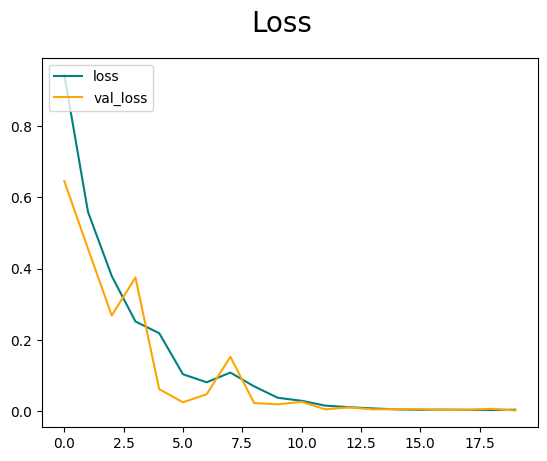

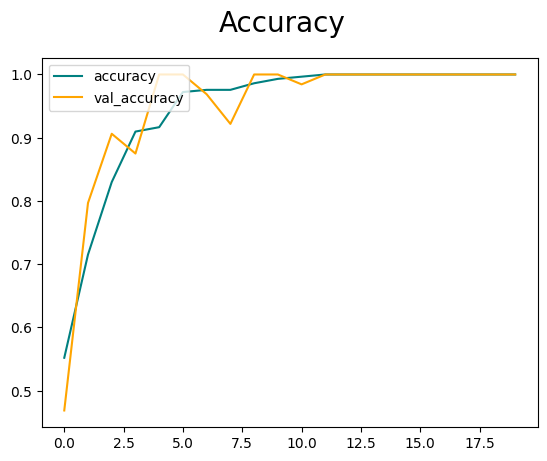

1/1 [==============================] - 0s 124ms/step
Categorical Accuracy: 1.0


In [3]:
#binary
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.callbacks import TensorBoard
from keras.metrics import CategoricalAccuracy
from matplotlib import pyplot as plt

# Avoid OOM errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Data directory and supported image extensions
data_dir = '/content/drive/MyDrive/images'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# Verify and clean images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Removing unsupported file: {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}: {e}')

# Load and preprocess data
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(256, 256), batch_size=32)
data = data.map(lambda x, y: (x / 255.0, y))

# Split data into train, val, test sets
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Build model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(len(os.listdir(data_dir)), activation='softmax')  # Softmax for multi-class
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
logdir = 'logs'
tensorboard_callback = TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

# Plot Loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Plot Accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate model on test data using Categorical Accuracy for multi-class classification
cat_acc = CategoricalAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    cat_acc.update_state(tf.one_hot(y, depth=len(os.listdir(data_dir))), yhat)

print(f'Categorical Accuracy: {cat_acc.result().numpy()}')

# Save model
model.save('models/image_classifier.h5')
new_model = tf.keras.models.load_model('models/image_classifier.h5')



In [8]:
# Class label mapping
class_labels = {0: 'Geyser', 1: 'Refrigerator'}

# Predict on a new image
img = cv2.imread('Geyser (882).jpg')  # Replace with your image path

if img is None:
    print("Could not read the image. Please check the file path.")
else:
    resize = tf.image.resize(img, (256, 256))
    yhat = new_model.predict(np.expand_dims(resize / 255.0, 0))
    predicted_class = np.argmax(yhat)

    # Decode the predicted class to the original label
    predicted_label = class_labels.get(predicted_class, "Unknown")
    print(f'Predicted class: {predicted_label}')


1/1 [==============================] - 0s 29ms/step
Predicted class: Geyser


Found 7343 files belonging to 5 classes.
Class labels:
0: AC
1: Fridge
2: TV
3: Washing Machine
4: geyser
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
              

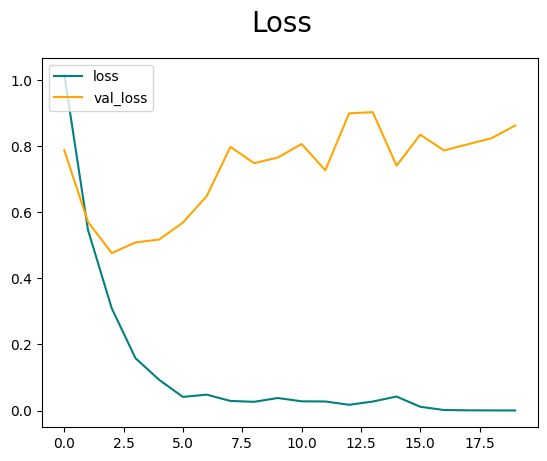

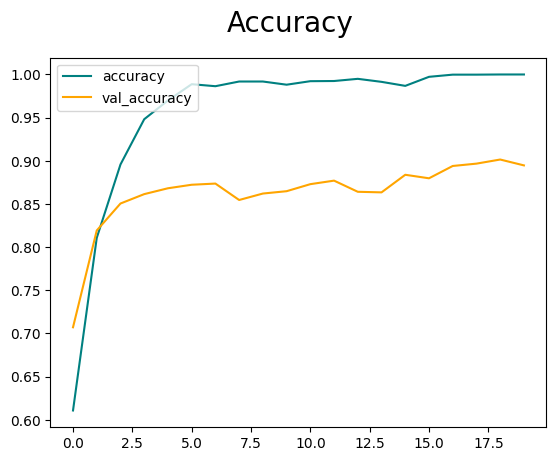

1/1 [==============================] - 0s 95ms/step
Categorical Accuracy: 0.8915159702301025


In [4]:
#mc
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.callbacks import TensorBoard
from keras.metrics import CategoricalAccuracy
from matplotlib import pyplot as plt

# Avoid OOM errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Data directory and supported image extensions
data_dir = '/content/drive/MyDrive/train'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# Verify and clean images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Removing unsupported file: {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}: {e}')

# Load and preprocess data
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(256, 256), batch_size=32)
data = data.map(lambda x, y: (x / 255.0, y))

# Print class labels with encoded values
class_names = sorted(os.listdir(data_dir))
class_labels = {i: class_names[i] for i in range(len(class_names))}
print("Class labels:")
for label, name in class_labels.items():
    print(f"{label}: {name}")

# Split data into train, val, test sets
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Build model
num_classes = len(class_names)
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
logdir = 'logs'
tensorboard_callback = TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

# Plot Loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Plot Accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate model on test data using Categorical Accuracy
cat_acc = CategoricalAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    cat_acc.update_state(tf.one_hot(y, depth=num_classes), yhat)

print(f'Categorical Accuracy: {cat_acc.result().numpy()}')

# Save model
model.save('models/image_classifier_mc.h5')
new_model = tf.keras.models.load_model('models/image_classifier_mc.h5')


In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Class label mapping (use your specific class names)
class_labels = {
    2: 'TV',
    4: 'Geyser',
    1: 'Refrigerator',
    3: 'Washing Machine',
    0: 'AC'
}

# Directory containing the images to predict
image_dir = '/content/drive/MyDrive/test'  # Replace with your actual directory path

# Load the saved model
new_model = tf.keras.models.load_model('/content/models/image_classifier_mc.h5')

# Iterate over each class folder in the directory
for class_folder in os.listdir(image_dir):
    class_folder_path = os.path.join(image_dir, class_folder)

    # Check if the path is a directory
    if os.path.isdir(class_folder_path):
        print(f'Processing folder: {class_folder}')

        # Iterate over each image in the class folder
        for image_file in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_file)

            # Read the image
            img = cv2.imread(image_path)

            if img is None:
                print(f"Could not read the image at {image_path}. Please check the file path.")
                continue

            # Resize and normalize the image
            resize = tf.image.resize(img, (256, 256))

            # Make a prediction
            yhat = new_model.predict(np.expand_dims(resize / 255.0, 0))
            predicted_class = np.argmax(yhat)

            # Decode the predicted class to the original label
            predicted_label = class_labels.get(predicted_class, "Unknown")
            print(f'Image: {image_file}, Predicted class: {predicted_label}')


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 30ms/step
Image: WM (246).jpg, Predicted class: Washing Machine
1/1 [==============================] - 0s 29ms/step
Image: WM (117).jpg, Predicted class: Washing Machine
1/1 [==============================] - 0s 31ms/step
Image: WM (109).jpg, Predicted class: Washing Machine
1/1 [==============================] - 0s 29ms/step
Image: WM (111).jpg, Predicted class: Washing Machine
1/1 [==============================] - 0s 29ms/step
Image: WM (113).jpg, Predicted class: Washing Machine
1/1 [==============================] - 0s 30ms/step
Image: WM (173).jpg, Predicted class: Washing Machine
1/1 [==============================] - 0s 29ms/step
Image: WM (242).jpg, Predicted class: Washing Machine
1/1 [==============================] - 0s 30ms/step
Image: WM (89).jpg, Predicted class: Refrigerator
1/1 [==============================] - 0s 29ms/step
Image: WM (94).jpg, Predicted class: Washing Machine


In [7]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

# Class label mapping (use your specific class names and encoding)
class_labels = {
    2: 'TV',
    4: 'Geyser',
    1: 'Refrigerator',
    3: 'Washing Machine',
    0: 'AC'
}

# Reverse mapping for class labels to encoded values
label_to_class = {v: k for k, v in class_labels.items()}

# Directory containing the images to predict
image_dir = '/content/drive/MyDrive/test'  # Replace with your actual directory path

# Load the saved model
new_model = tf.keras.models.load_model('/content/models/image_classifier_mc.h5')

# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

# Iterate over each class folder in the directory
for class_folder in os.listdir(image_dir):
    class_folder_path = os.path.join(image_dir, class_folder)

    # Check if the path is a directory and matches a known class
    if os.path.isdir(class_folder_path) and class_folder in label_to_class:
        print(f'Processing folder: {class_folder}')

        # Get the true label for this folder
        true_label = label_to_class[class_folder]

        # Iterate over each image in the class folder
        for image_file in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_file)

            # Read the image
            img = cv2.imread(image_path)
            if img is None:
                print(f"Could not read the image at {image_path}. Please check the file path.")
                continue

            # Resize and normalize the image
            resize = tf.image.resize(img, (256, 256))

            # Make a prediction
            yhat = new_model.predict(np.expand_dims(resize / 255.0, 0))
            predicted_class = np.argmax(yhat)

            # Store the true and predicted labels
            y_true.append(true_label)
            y_pred.append(predicted_class)

            # Decode the predicted class to the original label
            predicted_label = class_labels.get(predicted_class, "Unknown")
            print(f'Image: {image_file}, Predicted class: {predicted_label}')

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels.values()))


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 31ms/step
Image: WM (89).jpg, Predicted class: Refrigerator
1/1 [==============================] - 0s 32ms/step
Image: WM (94).jpg, Predicted class: Washing Machine
1/1 [==============================] - 0s 31ms/step
Image: WM (92).jpg, Predicted class: Washing Machine
1/1 [==============================] - 0s 31ms/step
Image: WM (75).jpg, Predicted class: Washing Machine
1/1 [==============================] - 0s 30ms/step
Image: WM (93).jpg, Predicted class: Washing Machine
1/1 [==============================] - 0s 30ms/step
Image: WM (86).jpg, Predicted class: Washing Machine
1/1 [==============================] - 0s 31ms/step
Image: WM (83).jpg, Predicted class: Washing Machine
1/1 [==============================] - 0s 31ms/step
Image: WM (85).jpg, Predicted class: Washing Machine
1/1 [==============================] - 0s 33ms/step
Image: WM (54).jpg, Predicted class: Washing Machine
1/1 [==